____

# <font color=#FFAA11> Two-Temperature Model </font>

The TTM considered here is given by
$$\begin{align}
c_e \frac{\partial T_e}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_e \frac{\partial T_e}{\partial r}\right) - G (T_e - T_i), \\
c_i\frac{\partial T_i}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_i \frac{\partial T_i}{\partial r}\right) + G (T_e - T_i),
\end{align}
$$

which assumes a cylindrical plasma composed of electrons and ions with no mass flow. 

Main areas where major improvements are needed:
1. Plasma Formulary version of parameters
2. Allow density variation 
3. Nicer visualizations, including animations, would be nice to have in the long run.

Current Bug- Electron Heat Capacity definitely not right!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from physics import JT_GMS, SMT
from constants import *
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from exp_setup import Cylindrical_Grid, Experiment
from TTM_solver import TwoTemperatureModel

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Create Experimental Information

In [24]:
grid  = Cylindrical_Grid(100e-6, N=100) 
Zstar, A = 18, 40
Te_initial, Ti_initial = 18000, 10300 #[K]
laser_width = 50e-6 # [m]
n0 = 6.3e26

# Create Experimental layout and TTM solver
Argon_jt = Experiment(grid, n0, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Argon', model = "JT")
ttm_jt = TwoTemperatureModel(Argon_jt, model = "JT")

Argon_smt = Experiment(grid, n0, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Argon', model = "SMT")
ttm_smt = TwoTemperatureModel(Argon_smt, model = "SMT")

Current Te profile not exact, needs self-consistency condition.
Current Te profile not exact, needs self-consistency condition.


In [25]:
Argon_smt.Te

array([24122.27188975, 24095.43890476, 24015.12188728, 23881.86459525,
       23696.56647615, 23460.47255638, 23175.15950983, 22842.51812373,
       22464.73243465, 22044.25585659, 21583.78466592, 21086.22924397,
       20554.68350554, 19992.39296163, 19402.72187603, 18789.119978  ,
       18155.08918813, 17504.15080083, 16839.81354601, 16165.54292485,
       15484.7321808 , 14800.67522767, 14116.54181414, 13435.35515697,
       12759.97222754, 12093.06682619, 11437.11552981, 10794.38654936,
       10166.93148737,  9556.57994147,  8964.93685941,  8393.38251448,
        7843.07493814,  7314.95461949,  6809.75125903,  6327.99234719,
        5870.01332639,  5435.96908856,  5025.84655804,  4639.4781125 ,
        4276.55560089,  3936.64472797,  3619.19958816,  3323.5771476 ,
        3049.05149168,  2794.82767455,  2560.05502848,  2343.83981173,
        2145.25709542,  1963.36181064,  1797.19889767,  1645.81251825,
        1508.25431012,  1383.59067937,  1270.90914103,  1169.32373156,
      

In [26]:
print("JT Model")
ttm_jt.make_times()
ttm_jt.print_timescales()

print("\nSMT Model")
ttm_smt.make_times()
ttm_smt.print_timescales()

JT Model

Simulation time: 1.0e+00 ns,  dt = 2.1e+01 ps, steps = 50
  Diffusion time (r_max): e:4.8e+03 ns, i:1.3e+45 ns 
  Diffusion time (dr): e:4.9e-01 ns, i:1.3e+41 ns 
  Thermalization Times: 2.06e+02 ps  2.06e+02 ps

SMT Model

Simulation time: 1.0e+00 ns,  dt = 2.1e+01 ps, steps = 50
  Diffusion time (r_max): e:2.2e+03 ns, i:1.3e+45 ns 
  Diffusion time (dr): e:2.3e-01 ns, i:1.3e+41 ns 
  Thermalization Times: 2.09e+02 ps  2.09e+02 ps


# Solve Two Temperature Model

In [14]:
JT_GMS.ei_relaxation_times(ttm_jt.n_e, ttm_jt.n_i,ttm_jt.experiment.m_i, ttm_jt.Zbar, ttm_jt.Te,ttm_jt.Ti)

(array([2.06402223e-10, 2.06464570e-10, 2.06651993e-10, 2.06965632e-10,
        2.07407396e-10, 2.07979958e-10, 2.08686769e-10, 2.09532059e-10,
        2.10520850e-10, 2.11658964e-10, 2.12953033e-10, 2.14410509e-10,
        2.16039677e-10, 2.17849660e-10, 2.19850431e-10, 2.22052813e-10,
        2.24468480e-10, 2.27109948e-10, 2.29990565e-10, 2.33124477e-10,
        2.36526588e-10, 2.40212505e-10, 2.44198450e-10, 2.48501152e-10,
        2.53137707e-10, 2.58125390e-10, 2.63481431e-10, 2.69222727e-10,
        2.75365503e-10, 2.81924897e-10, 2.88914471e-10, 2.96345648e-10,
        3.04227057e-10, 3.12563804e-10, 3.21356665e-10, 3.30601213e-10,
        3.40286912e-10, 3.50396189e-10, 3.60903545e-10, 3.71774755e-10,
        3.82966214e-10, 3.94424524e-10, 4.06086388e-10, 4.17878918e-10,
        4.29720408e-10, 4.41521667e-10, 4.53187903e-10, 4.64621185e-10,
        4.75723384e-10, 4.86399497e-10, 4.96561150e-10, 5.06130062e-10,
        5.15041206e-10, 5.23245398e-10, 5.30711079e-10, 5.374251

In [19]:
ttm_jt.solve_TTM(tmax=18e-9,dt=1e-12)
ttm_smt.solve_TTM(tmax=18e-9, dt=1e-12)

# PLOTS

In [20]:
def plot_temp_profiles(ttm, grid, plot_times = None, ax = None, title=''):

    if plot_times is None:
        plot_times = (np.linspace(0,len(ttm.t_list)*0.99,num=4,endpoint=True)).astype(int)  # Intermediate times for plotting        
        
    # Plot temperature profiles at intermediate times
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(14,10),facecolor='w')
    
    plot_idx = 0
    for plot_idx, ti in enumerate(plot_times):
        t = ttm_jt.t_list[ti]
        ax.plot(grid.cell_centers*1e6, ttm.Te_list[ti][:-1]*1e-3, '--', color=colors[plot_idx], label=f"$T_e$: t={t*1e9:.1e} [ns]")
        ax.plot(grid.cell_centers*1e6, ttm.Ti_list[ti][:-1]*1e-3, '-' , color=colors[plot_idx], label=f"$T_i$: t={t*1e9:.1e} [ns]")
        # plot_idx += 1


    # Plot settings
    ax.set_xlabel(r"Radial distance [$\mu$m]",fontsize=20)
    ax.set_ylabel("Temperature [kK]",fontsize=20)
    ax.tick_params(labelsize=20)
    # ax.set_ylim(0,10.1)
    ax.legend(fontsize=15)
    ax.grid(alpha = 0.3)
    ax.set_title(title, fontsize=20)


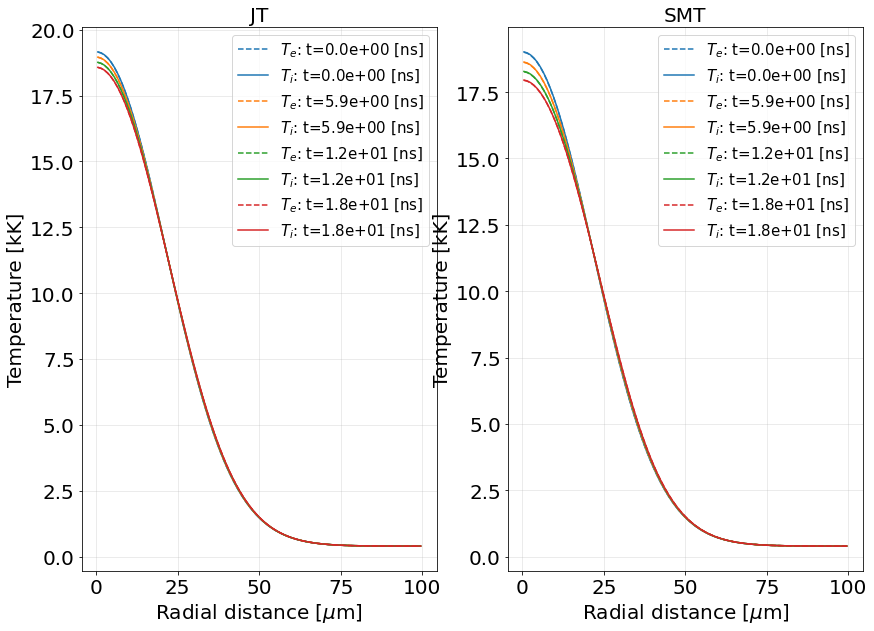

In [21]:
fig, ax = plt.subplots(1,2, figsize=(14,10),facecolor='w')

plot_temp_profiles(ttm_jt, grid, ax = ax[0], title='JT')
plot_temp_profiles(ttm_smt, grid, ax = ax[1], title='SMT')


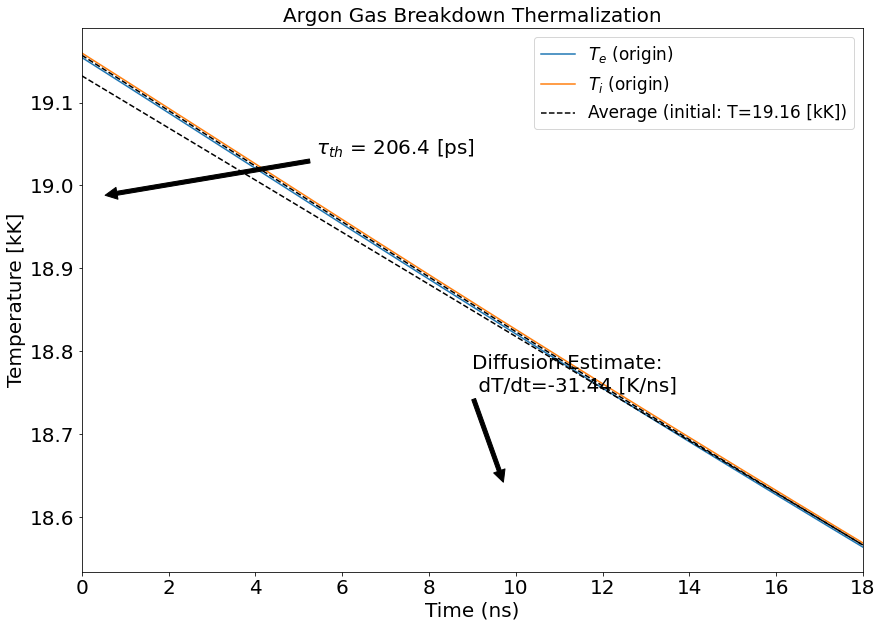

In [22]:
ttm  = ttm_jt
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')

ti_1, ti_2 = -20000, -1
ti_1, ti_2 = -100, -1
T_av_1 = (ttm.Ti_list[ti_1][0] + ttm.Te_list[ti_1][0] )/2
T_av_2 = (ttm.Ti_list[ti_2][0] + ttm.Te_list[ti_2][0] )/2
dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])
T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))

T_av = 0.5*(np.array(ttm.Te_list) + np.array(ttm.Ti_list))


ax.plot(np.array(ttm.t_list)*1e9, np.array(ttm.Te_list).T[0]*1e-3,label=r"$T_e$ (origin)")
ax.plot(np.array(ttm.t_list)*1e9, np.array(ttm.Ti_list).T[0]*1e-3,label=r"$T_i$ (origin)")
ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k')#,label='Diffusion Estimate: dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9))
ax.plot(np.array(ttm.t_list)*1e9, T_av[:,0]*1e-3,'--k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0,0]*1e-3))

ax.annotate(r'$\tau_{th}$' + ' = {0:.1f} [ps]'.format(ttm.experiment.τei_Equilibration*1e12), xy=(0.1, 0.6), xycoords='figure fraction',
            xytext=(0.3, .8), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('Diffusion Estimate:\n dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9), xy=(0.5, 0.2), xycoords='figure fraction',
            xytext=(0.5, .4), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))


# Plot settings
ax.set_xlabel(r"Time (ns)", fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,ttm.tmax*1e9)

ax.set_title('Argon Gas Breakdown Thermalization',fontsize=20)
ax.legend(fontsize=17)
plt.show()

### Bulk Temperature Measurement

In [10]:
width_index = np.argmin(np.abs(grid.r - Argon.laser_width))

Te_bulks = np.array([  grid.integrate_f(Te[:-1]*ttm.n_e[:-1], endpoint=width_index)/grid.integrate_f(ttm.n_e[:-1], endpoint=width_index) for Te in ttm.Te_list])
Ti_bulks = np.array([  grid.integrate_f(Ti[:-1]*ttm.n_i[:-1], endpoint=width_index)/grid.integrate_f(ttm.n_i[:-1], endpoint=width_index) for Ti in ttm.Ti_list])
T_av = 0.5*(Te_bulks + Ti_bulks)


NameError: name 'Argon' is not defined

In [ ]:
Te_bulks, Ti_bulks, T_av

In [ ]:
ttm.Te_list[0][width_index]

In [ ]:
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')


# ti_1, ti_2 = -20000, -1
ti_1, ti_2 = -100, -1

T_av_1 = T_av[ti_1]
T_av_2 = T_av[ti_2]

dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])

T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))


ax.plot(np.array(ttm.t_list)*1e9, Te_bulks*1e-3,label=r"$T_e$ (bulk)")
ax.plot(np.array(ttm.t_list)*1e9, Ti_bulks*1e-3,label=r"$T_i$ (bulk)")
ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k')#,label='Diffusion Estimate: dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9))
ax.plot(np.array(ttm.t_list)*1e9, T_av*1e-3,'-k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0]*1e-3))

ax.annotate(r'$\tau_{th}$' + ' = {0:.1f} [ps]'.format(ttm.experiment.τei_Equilibration*1e12), xy=(0.1, 0.6), xycoords='figure fraction',
            xytext=(0.3, .8), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('Diffusion Estimate:\n dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9), xy=(0.5, 0.2), xycoords='figure fraction',
            xytext=(0.5, .4), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))


# Plot settings
ax.set_xlabel(r"Time (ns)", fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,ttm.tmax*1e9)

ax.set_title('Argon Gas Breakdown Thermalization',fontsize=20)
ax.legend(fontsize=17)
plt.show()